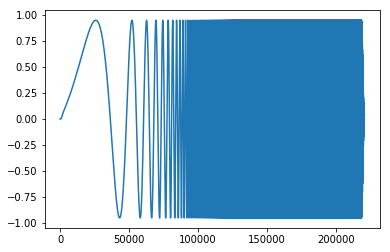

In [3]:
import matplotlib.pyplot as plt
from measuretf import exponential_sweep, multichannel_serial_sound

T = 5
fs = int(44.1e3)
sweep = exponential_sweep(T, fs)
plt.plot(sweep)
plt.show()

In [2]:
import sounddevice as sd
sd.play(sweep, fs)